Tópico 22 – Aplicar o método Crescimento de regiões em imagens tons de cinza com inicialização com click na
imagem. Tópico da aula 9.

In [1]:
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def Click(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print ('Posição do clique: ' + str(x) + ', ' + str(y))
        print ('Pressione enter para iniciar o processo de Crescimento de Região e aguarde o processamento')
        s_box = y, x
        boxes.append(s_box)

In [3]:
def CrescimentoDeRegiao(img, seed):    
    #Parâmetros do crescimento de região
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    region_threshold = 0.2
    region_size = 1
    intensity_difference = 0
    neighbor_points_list = []
    neighbor_intensity_list = []

    # Média do segmento de região
    region_mean = img[seed]

    # Parâmetros da imagem
    height, width = img.shape
    image_size = height * width

    # Inicialização do segmento da saída da imagem
    segmented_img = np.zeros((height, width, 1), np.uint8)

    # Crescimento da região de acordo com o threshold
    while (intensity_difference < region_threshold) & (region_size < image_size):
        
        # Vizinhança
        for i in range(4):
            
            # Calcula a posição do pixel vizinho
            x_new = seed[0] + neighbors[i][0]
            y_new = seed[1] + neighbors[i][1]

            # Verifica se está dentro da imagem
            check_inside = (x_new >= 0) & (y_new >= 0) & (x_new < height) & (y_new < width)

            # Adiciona vizinho se está dentro do limiar
            if check_inside:
                if segmented_img[x_new, y_new] == 0:
                    neighbor_points_list.append([x_new, y_new])
                    neighbor_intensity_list.append(img[x_new, y_new])
                    segmented_img[x_new, y_new] = 255

        # Adiciona pixel com a média da região
        distance = abs(neighbor_intensity_list - region_mean)
        pixel_distance = min(distance)
        index = np.where(distance == pixel_distance)[0][0]
        segmented_img[seed[0], seed[1]] = 255
        region_size += 1

        # Nova média da região
        region_mean = (region_mean * region_size + neighbor_intensity_list[index]) / (region_size + 1)

        # Atualiza o seed
        seed = neighbor_points_list[index]
        
        # Remove o valor das listas de vizinhança
        neighbor_intensity_list[index] = neighbor_intensity_list[-1]
        neighbor_points_list[index] = neighbor_points_list[-1]

    return segmented_img

Posição do clique: 182, 207
Pressione enter para iniciar o processo de Crescimento de Região e aguarde o processamento


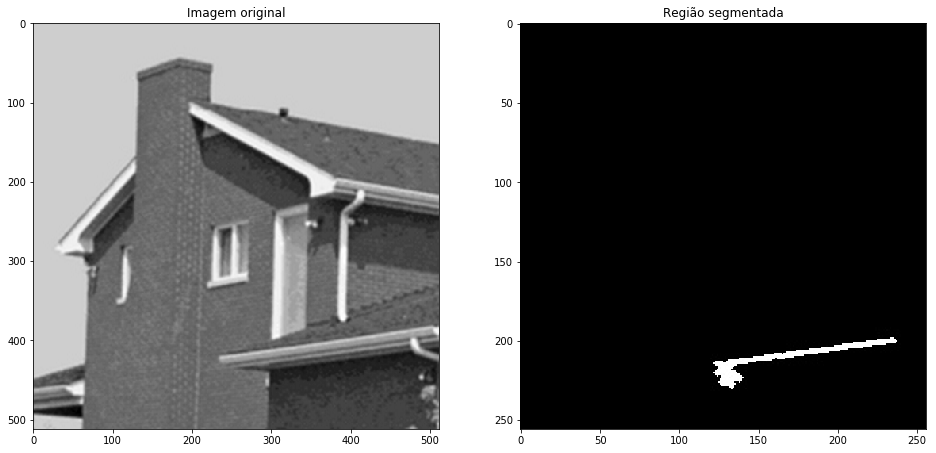

In [4]:
if __name__ == '__main__':
    boxes = []
    filename = 'imagens/house.tif'
    img = cv2.imread(filename, 0)
    resized = cv2.resize(img,(256, 256))
    cv2.namedWindow('Entrada: ')
    cv2.setMouseCallback('Entrada: ', Click, 0,)
    cv2.imshow('Entrada: ', resized)
    cv2.waitKey()    
    seed = boxes[-1]
    resultado = CrescimentoDeRegiao(resized, seed)    
    #cv2.imshow('Resultado: ', resultado)
    cv2.imwrite('imagens/22-1.jpg', resultado)    
    cv2.destroyAllWindows()
    imagem = np.array(cv2.imread('imagens/22-1.jpg', cv2.IMREAD_GRAYSCALE))
    
    plt.rcParams['figure.figsize'] = (16,16)
    plt.subplot(1, 2, 1)
    plt.imshow(img, 'gray')
    plt.title("Imagem original")
    
    plt.subplot(1, 2, 2)
    plt.imshow(imagem, 'gray')
    plt.title("Região segmentada")
    plt.show()    